In [25]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

In [26]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

JSON_PATH = Path("../data/anilist_top10000.json")
JSON_PATH

PosixPath('../data/anilist_top10000.json')

In [27]:
# JSON -> DataFrame
if not JSON_PATH.exists():
    raise FileNotFoundError("JSON 파일 없음!")

with JSON_PATH.open("r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,id,title,format,status,season,seasonYear,startDate,endDate,episodes,duration,averageScore,meanScore,popularity,favourites,genres,tags,stats,studios,staff
0,16498,"{'romaji': 'Shingeki no Kyojin', 'english': 'A...",TV,FINISHED,SPRING,2013.0,"{'year': 2013, 'month': 4, 'day': 7}","{'year': 2013, 'month': 9, 'day': 28}",25.0,24.0,85.0,85.0,923138,55764,"[Action, Drama, Fantasy, Mystery]","[{'name': 'Kaiju'}, {'name': 'Revenge'}, {'nam...","{'scoreDistribution': [{'score': 10, 'amount':...","{'nodes': [{'name': 'WIT STUDIO'}, {'name': 'P...","{'nodes': [{'name': {'full': 'Yuu Kobayashi'},..."
1,101922,"{'romaji': 'Kimetsu no Yaiba', 'english': 'Dem...",TV,FINISHED,SPRING,2019.0,"{'year': 2019, 'month': 4, 'day': 6}","{'year': 2019, 'month': 9, 'day': 28}",26.0,24.0,82.0,82.0,876899,42063,"[Action, Adventure, Drama, Fantasy, Supernatural]","[{'name': 'Demons'}, {'name': 'Shounen'}, {'na...","{'scoreDistribution': [{'score': 10, 'amount':...","{'nodes': [{'name': 'ufotable'}, {'name': 'Ani...","{'nodes': [{'name': {'full': 'Steve Staley'}, ..."
2,1535,"{'romaji': 'DEATH NOTE', 'english': 'Death Not...",TV,FINISHED,FALL,2006.0,"{'year': 2006, 'month': 10, 'day': 4}","{'year': 2007, 'month': 6, 'day': 27}",37.0,23.0,84.0,84.0,840513,44157,"[Mystery, Psychological, Supernatural, Thriller]","[{'name': 'Crime'}, {'name': 'Detective'}, {'n...","{'scoreDistribution': [{'score': 10, 'amount':...","{'nodes': [{'name': 'MADHOUSE'}, {'name': 'VAP...","{'nodes': [{'name': {'full': 'Aya Hirano'}, 'p..."
3,113415,"{'romaji': 'Jujutsu Kaisen', 'english': 'JUJUT...",TV,FINISHED,FALL,2020.0,"{'year': 2020, 'month': 10, 'day': 3}","{'year': 2021, 'month': 3, 'day': 27}",24.0,24.0,84.0,84.0,831521,49300,"[Action, Drama, Supernatural]","[{'name': 'Urban Fantasy'}, {'name': 'Shounen'...","{'scoreDistribution': [{'score': 10, 'amount':...","{'nodes': [{'name': 'Toho'}, {'name': 'MAPPA'}...",{'nodes': [{'name': {'full': 'Michael Sorich'}...
4,21459,"{'romaji': 'Boku no Hero Academia', 'english':...",TV,FINISHED,SPRING,2016.0,"{'year': 2016, 'month': 4, 'day': 3}","{'year': 2016, 'month': 6, 'day': 26}",13.0,24.0,76.0,76.0,777648,20698,"[Action, Adventure, Comedy]","[{'name': 'Super Power'}, {'name': 'Superhero'...","{'scoreDistribution': [{'score': 10, 'amount':...","{'nodes': [{'name': 'bones'}, {'name': 'Dentsu...","{'nodes': [{'name': {'full': 'Justin Cook'}, '..."


In [28]:
# title 정규화
df["title_romaji"] = df["title"].apply(lambda x: (x or {}).get("romaji"))
df["title_english"] = df["title"].apply(lambda x: (x or {}).get("english"))
df["title_native"] = df["title"].apply(lambda x: (x or {}).get("native"))

In [29]:
df[["id","title_romaji","title_english","title_native"]].head()

,id,title_romaji,title_english,title_native
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人
1,101922,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃
2,1535,DEATH NOTE,Death Note,DEATH NOTE
3,113415,Jujutsu Kaisen,JUJUTSU KAISEN,呪術廻戦
4,21459,Boku no Hero Academia,My Hero Academia,僕のヒーローアカデミア


In [30]:
# tags -> name 리스트로 정리
# tags: list[{name: ...}, ...] 형태니까, name만 빼온다
def extract_tag_names(tag_list):
    if not isinstance(tag_list, list):
        return []
    return [t.get("name") for t in tag_list if isinstance(t, dict)]

df["tag_list"] = df["tags"].apply(extract_tag_names)
df["tag_list"].head()

0    [Kaiju, Revenge, Military, Tragedy, Post-Apoca...
1    [Demons, Shounen, Swordplay, Male Protagonist,...
2    [Crime, Detective, Anti-Hero, Male Protagonist...
3    [Urban Fantasy, Shounen, Youkai, Super Power, ...
4    [Super Power, Superhero, Shounen, Primarily Te...
Name: tag_list, dtype: object

In [31]:
# genres는 OHE(OneHot Encoding)하면 좋을듯?
df_genre = df[["id", "genres"]].explode("genres")
df_genre = df_genre.dropna(subset=["genres"])

genre_counts = df_genre["genres"].value_counts()
genre_counts

genres
Comedy           4453
Action           3725
Fantasy          2785
Drama            2525
Adventure        2412
Sci-Fi           2172
Romance          2095
Slice of Life    1832
Supernatural     1443
Ecchi             866
Mecha             863
Mystery           781
Sports            591
Music             533
Psychological     482
Horror            389
Mahou Shoujo      334
Thriller          200
Name: count, dtype: int64

In [32]:
df_genre_ohe = pd.get_dummies(df_genre["genres"], prefix="genre")
df_genre_ohe = pd.concat([df_genre[["id"]], df_genre_ohe], axis=1)
df_genre_ohe = df_genre_ohe.groupby("id", as_index=False).sum()

df_genre_ohe.head()

,id,genre_Action,genre_Adventure,genre_Comedy,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Horror,genre_Mahou Shoujo,genre_Mecha,genre_Music,genre_Mystery,genre_Psychological,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Thriller
0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,6,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,7,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
# tags도 OHE
df_tag = df[["id", "tag_list"]].explode("tag_list")
df_tag = df_tag.dropna(subset=["tag_list"])

tag_counts = df_tag["tag_list"].value_counts()
tag_counts

tag_list
Male Protagonist         3826
Female Protagonist       3325
School                   2369
Primarily Female Cast    1893
Shounen                  1815
                         ... 
Sweat                       1
4-koma                      1
Irrumatio                   1
Futanari                    1
Defloration                 1
Name: count, Length: 391, dtype: int64

In [34]:
# tags는 Top200만 쓰자
TOP_N_TAGS = 200
top_tags = tag_counts.head(TOP_N_TAGS).index.tolist()

df_tag_filtered = df_tag[df_tag["tag_list"].isin(top_tags)]

In [35]:
df_tag_ohe = pd.get_dummies(df_tag_filtered["tag_list"], prefix="tag")
df_tag_ohe = pd.concat([df_tag_filtered[["id"]], df_tag_ohe], axis=1)
df_tag_ohe = df_tag_ohe.groupby("id", as_index=False).sum()

df_tag_ohe.head()

,id,tag_Achronological Order,tag_Acting,tag_Adoption,tag_Advertisement,tag_Afterlife,tag_Age Gap,tag_Age Regression,tag_Aliens,tag_Alternate Universe,tag_Amnesia,tag_Anachronism,tag_Angels,tag_Animals,tag_Anthropomorphism,tag_Anti-Hero,tag_Archery,tag_Artificial Intelligence,tag_Assassins,tag_Athletics,tag_Aviation,tag_Band,tag_Baseball,tag_Battle Royale,tag_Bisexual,tag_Body Horror,tag_Body Swapping,tag_Boys' Love,tag_Bullying,tag_CGI,tag_Card Battle,tag_Cars,tag_Chibi,tag_Chuunibyou,tag_Class Struggle,tag_Classic Literature,tag_Clone,tag_Coastal,tag_Cohabitation,tag_College,tag_Coming of Age,tag_Conspiracy,tag_Cosmic Horror,tag_Crime,tag_Crossdressing,tag_Crossover,tag_Cult,tag_Cultivation,tag_Curses,tag_Cute Boys Doing Cute Things,tag_Cute Girls Doing Cute Things,tag_Cyberpunk,tag_Cyborg,tag_Dancing,tag_Delinquents,tag_Demons,tag_Denpa,tag_Desert,tag_Detective,tag_Disability,tag_Dissociative Identities,tag_Dragons,tag_Drawing,tag_Drugs,tag_Dungeon,tag_Dystopian,tag_Educational,tag_Elf,tag_Ensemble Cast,tag_Environmental,tag_Episodic,tag_Espionage,tag_Fairy,tag_Fairy Tale,tag_Family Life,tag_Female Harem,tag_Female Protagonist,tag_Femboy,tag_Food,tag_Foreign,tag_Found Family,tag_Fugitive,tag_Full CGI,tag_Gangs,tag_Gender Bending,tag_Ghost,tag_Gods,tag_Gore,tag_Guns,tag_Gyaru,tag_Henshin,tag_Heterosexual,tag_Hikikomori,tag_Historical,tag_Idol,tag_Incest,tag_Isekai,tag_Iyashikei,tag_Josei,tag_Kaiju,tag_Kemonomimi,tag_Kids,tag_Kuudere,tag_LGBTQ+ Themes,tag_Language Barrier,tag_Lost Civilization,tag_Love Triangle,tag_Magic,tag_Maids,tag_Male Harem,tag_Male Protagonist,tag_Marriage,tag_Martial Arts,tag_Medieval,tag_Memory Manipulation,tag_Meta,tag_Military,tag_Monster Girl,tag_Motorcycles,tag_Musical Theater,tag_Mythology,tag_Nekomimi,tag_Ninja,tag_No Dialogue,tag_Nudity,tag_Ojou-sama,tag_Orphan,tag_Otaku Culture,tag_Outdoor Activities,tag_Parody,tag_Philosophy,tag_Pirates,tag_Police,tag_Politics,tag_Post-Apocalyptic,tag_Primarily Adult Cast,tag_Primarily Child Cast,tag_Primarily Female Cast,tag_Primarily Male Cast,tag_Primarily Teen Cast,tag_Proxy Battle,tag_Rape,tag_Real Robot,tag_Rehabilitation,tag_Reincarnation,tag_Religion,tag_Revenge,tag_Robots,tag_Royal Affairs,tag_Rural,tag_Samurai,tag_Satire,tag_School,tag_School Club,tag_Seinen,tag_Shapeshifting,tag_Ships,tag_Shoujo,tag_Shounen,tag_Shrine Maiden,tag_Slapstick,tag_Slavery,tag_Snowscape,tag_Space,tag_Space Opera,tag_Spearplay,tag_Steampunk,tag_Suicide,tag_Super Power,tag_Super Robot,tag_Superhero,tag_Surreal Comedy,tag_Survival,tag_Swordplay,tag_Tanned Skin,tag_Teacher,tag_Terrorism,tag_Time Manipulation,tag_Time Skip,tag_Tokusatsu,tag_Tomboy,tag_Tragedy,tag_Trains,tag_Transgender,tag_Travel,tag_Tsundere,tag_Twins,tag_Unrequited Love,tag_Urban,tag_Urban Fantasy,tag_Vampire,tag_Video Games,tag_Virtual World,tag_War,tag_Witch,tag_Work,tag_Yakuza,tag_Yandere,tag_Youkai,tag_Yuri,tag_Zombie
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0

In [36]:
# studios는 개많으니까, OHE 안하는게 나을듯
# 하는게 더 유의미할 수도 ?
def extract_studio_names(studio_obj):
    if not isinstance(studio_obj, dict):
        return []
    return [n.get("name") for n in (studio_obj.get("nodes") or []) if isinstance(n, dict)]

df["studios_list"] = df["studios"].apply(extract_studio_names)
df[["id", "studios_list"]].head()

,id,studios_list
0,16498,"[WIT STUDIO, Pony Canyon, Kodansha, Production..."
1,101922,"[ufotable, Aniplex, Shueisha, Aniplex of Ameri..."
2,1535,"[MADHOUSE, VAP, Viz Media, Nippon Television N..."
3,113415,"[Toho, MAPPA, Shueisha, Sumzap, Mainichi Broad..."
4,21459,"[bones, Dentsu, Mainichi Broadcasting System, ..."


In [37]:
def get_weighted_score(stats_obj):
    if not isinstance(stats_obj, dict):
        return None
    dist = stats_obj.get("scoreDistribution") or []
    total = 0
    count = 0
    for item in dist:
        score = item.get("score")
        amount = item.get("amount", 0)
        total += score * amount
        count += amount
    return total / count if count > 0 else None


def get_drop_rate(stats_obj):
    if not isinstance(stats_obj, dict):
        return None
    dist = stats_obj.get("statusDistribution") or []

    total = 0
    dropped = 0
    for item in dist:
        status = item.get("status")
        amount = item.get("amount", 0)
        total += amount
        if status == "DROPPED":
            dropped = amount
    return dropped / total if total > 0 else None

In [38]:
df["stats_weighted_score"] = df["stats"].apply(get_weighted_score)
df["stats_drop_rate"] = df["stats"].apply(get_drop_rate)

In [50]:
def get_main_studio(studios_obj):
    """
    AniList studios 필드에서 isMain == True 인 스튜디오 이름 하나를 반환.
    없으면 None.
    studios_obj 예시:
    {
      "nodes": [{"name": "WIT STUDIO"}, {"name": "Pony Canyon"}, ...],
      "edges": [{"isMain": true}, {"isMain": false}, ...]
    }
    """
    if not isinstance(studios_obj, dict):
        return None
    
    nodes = studios_obj.get("nodes") or []
    edges = studios_obj.get("edges") or []
    
    for node, edge in zip(nodes, edges):
        if isinstance(edge, dict) and edge.get("isMain"):
            if isinstance(node, dict):
                return node.get("name")
    return None


def get_studios_list(studios_obj):
    """
    그냥 참고용: 모든 스튜디오 이름을 리스트 형태로 뽑고 싶을 때.
    나중에 필요 없으면 안 써도 됨.
    """
    if not isinstance(studios_obj, dict):
        return []
    nodes = studios_obj.get("nodes") or []
    return [n.get("name") for n in nodes if isinstance(n, dict) and n.get("name")]

In [51]:
df["main_studio"] = df["studios"].apply(get_main_studio)
df["studios_list"] = df["studios"].apply(get_studios_list)

df[["title_romaji", "main_studio", "studios_list"]].head()

,title_romaji,main_studio,studios_list
0,Shingeki no Kyojin,WIT STUDIO,"[WIT STUDIO, Pony Canyon, Kodansha, Production..."
1,Kimetsu no Yaiba,ufotable,"[ufotable, Aniplex, Shueisha, Aniplex of Ameri..."
2,DEATH NOTE,MADHOUSE,"[MADHOUSE, VAP, Viz Media, Nippon Television N..."
3,Jujutsu Kaisen,MAPPA,"[Toho, MAPPA, Shueisha, Sumzap, Mainichi Broad..."
4,Boku no Hero Academia,bones,"[bones, Dentsu, Mainichi Broadcasting System, ..."


In [39]:
# 빠졌던 startDate, endDate, stats 데이터 프레임에 추가
df["start_year"] = df["startDate"].apply(lambda d: (d or {}).get("year"))
df["start_month"] = df["startDate"].apply(lambda d: (d or {}).get("month"))
df["start_day"] = df["startDate"].apply(lambda d: (d or {}).get("day"))

df["end_year"] = df["endDate"].apply(lambda d: (d or {}).get("year"))
df["end_month"] = df["endDate"].apply(lambda d: (d or {}).get("month"))
df["end_day"] = df["endDate"].apply(lambda d: (d or {}).get("day"))

In [40]:
def safe_date(d):
    """
    AniList FuzzyDate {year, month, day} -> datetime.date 로 변환.
    year, month 없으면 None.
    day가 None이면 1일로 가정.
    """
    if not isinstance(d, dict):
        return None
    
    y = d.get("year")
    m = d.get("month")
    day = d.get("day") or 1

    if y and m:
        try:
            return datetime.date(y, m, day)
        except ValueError:
            # 말도 안 되는 날짜면 1일로 다시 시도
            try:
                return datetime.date(y, m, 1)
            except Exception:
                return None
    return None


def airing_days_finished(start_d, end_d, status):
    """
    FINISHED 작품에 대해서만 방영기간(일수) 계산.
    그 외 상태는 None 반환.
    """
    if status != "FINISHED":
        return None
    
    s = safe_date(start_d)
    e = safe_date(end_d)

    if s and e:
        delta = (e - s).days
        return delta if delta >= 0 else None
    return None

In [41]:
df["airing_days"] = df.apply(
    lambda row: airing_days_finished(
        row.get("startDate"),
        row.get("endDate"),
        row.get("status"),
    ),
    axis=1,
)

df[["title_romaji", "status", "airing_days"]].head()

,title_romaji,status,airing_days
0,Shingeki no Kyojin,FINISHED,174.0
1,Kimetsu no Yaiba,FINISHED,175.0
2,DEATH NOTE,FINISHED,266.0
3,Jujutsu Kaisen,FINISHED,175.0
4,Boku no Hero Academia,FINISHED,84.0


In [42]:
drop_cols = ["title", "tags", "studios", "staff"]

df_base = df.drop(columns=[c for c in drop_cols if c in df.columns])

df_final = (
    df_base
    .merge(df_genre_ohe, on="id", how="left")
    .merge(df_tag_ohe, on="id", how="left")
)

df_final.head()

,id,format,status,season,seasonYear,startDate,endDate,episodes,duration,averageScore,meanScore,popularity,favourites,genres,stats,title_romaji,title_english,title_native,tag_list,studios_list,stats_weighted_score,stats_drop_rate,start_year,start_month,start_day,end_year,end_month,end_day,airing_days,genre_Action,genre_Adventure,genre_Comedy,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Horror,genre_Mahou Shoujo,genre_Mecha,genre_Music,genre_Mystery,genre_Psychological,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Thriller,tag_Achronological Order,tag_Acting,tag_Adoption,tag_Advertisement,tag_Afterlife,tag_Age Gap,tag_Age Regression,tag_Aliens,tag_Alternate Universe,tag_Amnesia,tag_Anachronism,tag_Angels,tag_Animals,tag_Anthropomorphism,tag_Anti-Hero,tag_Archery,tag_Artificial Intelligence,tag_Assassins,tag_Athletics,tag_Aviation,tag_Band,tag_Baseball,tag_Battle Royale,tag_Bisexual,tag_Body Horror,tag_Body Swapping,tag_Boys' Love,tag_Bullying,tag_CGI,tag_Card Battle,tag_Cars,tag_Chibi,tag_Chuunibyou,tag_Class Struggle,tag_Classic Literature,tag_Clone,tag_Coastal,tag_Cohabitation,tag_College,tag_Coming of Age,tag_Conspiracy,tag_Cosmic Horror,tag_Crime,tag_Crossdressing,tag_Crossover,tag_Cult,tag_Cultivation,tag_Curses,tag_Cute Boys Doing Cute Things,tag_Cute Girls Doing Cute Things,tag_Cyberpunk,tag_Cyborg,tag_Dancing,tag_Delinquents,tag_Demons,tag_Denpa,tag_Desert,tag_Detective,tag_Disability,tag_Dissociative Identities,tag_Dragons,tag_Drawing,tag_Drugs,tag_Dungeon,tag_Dystopian,tag_Educational,tag_Elf,tag_Ensemble Cast,tag_Environmental,tag_Episodic,tag_Espionage,tag_Fairy,tag_Fairy Tale,tag_Family Life,tag_Female Harem,tag_Female Protagonist,tag_Femboy,tag_Food,tag_Foreign,tag_Found Family,tag_Fugitive,tag_Full CGI,tag_Gangs,tag_Gender Bending,tag_Ghost,tag_Gods,tag_Gore,tag_Guns,tag_Gyaru,tag_Henshin,tag_Heterosexual,tag_Hikikomori,tag_Historical,tag_Idol,tag_Incest,tag_Isekai,tag_Iyashikei,tag_Josei,tag_Kaiju,tag_Kemonomimi,tag_Kids,tag_Kuudere,tag_LGBTQ+ Themes,tag_Language Barrier,tag_Lost Civilization,tag_Love Triangle,tag_Magic,tag_Maids,tag_Male Harem,tag_Male Protagonist,tag_Marriage,tag_Martial Arts,tag_Medieval,tag_Memory Manipulation,tag_Meta,tag_Military,tag_Monster Girl,tag_Motorcycles,tag_Musical Theater,tag_Mythology,tag_Nekomimi,tag_Ninja,tag_No Dialogue,tag_Nudity,tag_Ojou-sama,tag_Orphan,tag_Otaku Culture,tag_Outdoor Activities,tag_Parody,tag_Philosophy,tag_Pirates,tag_Police,tag_Politics,tag_Post-Apocalyptic,tag_Primarily Adult Cast,tag_Primarily Child Cast,tag_Primarily Female Cast,tag_Primarily Male Cast,tag_Primarily Teen Cast,tag_Proxy Battle,tag_Rape,tag_Real Robot,tag_Rehabilitation,tag_Reincarnation,tag_Religion,tag_Revenge,tag_Robots,tag_Royal Affairs,tag_Rural,tag_Samurai,tag_Satire,tag_School,tag_School Club,tag_Seinen,tag_Shapeshifting,tag_Ships,tag_Shoujo,tag_Shounen,tag_Shrine Maiden,tag_Slapstick,tag_Slavery,tag_Snowscape,tag_Space,tag_Space Opera,tag_Spearplay,tag_Steampunk,tag_Suicide,tag_Super Power,tag_Super Robot,tag_Superhero,tag_Surreal Comedy,tag_Survival,tag_Swordplay,tag_Tanned Skin,tag_Teacher,tag_Terrorism,tag_Time Manipulation,tag_Time Skip,tag_Tokusatsu,tag_Tomboy,tag_Tragedy,tag_Trains,tag_Transgender,tag_Travel,tag_Tsundere,tag_Twins,tag_Unrequited Love,tag_Urban,tag_Urban Fantasy,tag_Vampire,tag_Video Games,tag_Virtual World,tag_War,tag_Witch,tag_Work,tag_Yakuza,tag_Yandere,tag_Youkai,tag_Yuri,tag_Zombie
0,16498,TV,FINISHED,SPRING,2013.0,"{'year': 2013, 'month': 4, 'day': 7}","{'year': 2013, 'month': 9, 'day': 28}",25.0,24.0,85.0,85.0,923138,55764,"[Action, Drama, Fantasy, Mystery]","{'scoreDistribution': [{'score': 10, 'amount':...",Shingeki no Kyojin,Attack on Titan,進撃の巨人,"[Kaiju, Revenge, Military, Tragedy, Post-Apoca...","[WIT STUDIO, Pony Canyon, Kodansha, Production...",86.165641,0.015961,2013.0,4.0,7.0,2013.0,9.0,28.0,174.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [43]:
# 컬럼 순서 바꾸기
# status 컬럼 위치 구하기
cols = list(df_final.columns)
idx = cols.index("status")

# 우리가 status 다음에 넣고 싶은 컬럼 리스트
new_cols = [
    "start_year", "start_month", "start_day",
    "end_year", "end_month", "end_day",
    "airing_days"
]

# 혹시 기존 df에 없거나 중복되면 문제 생기므로 필터링
new_cols = [c for c in new_cols if c in df_final.columns]

# 기존 위치에서 제거
for c in new_cols:
    if c in cols:
        cols.remove(c)

# status 뒤에 순서대로 삽입
for i, c in enumerate(new_cols):
    cols.insert(idx + 1 + i, c)

# 새 순서로 재배치
df_final = df_final[cols]
df_final.head()

,id,format,status,start_year,start_month,start_day,end_year,end_month,end_day,airing_days,season,seasonYear,startDate,endDate,episodes,duration,averageScore,meanScore,popularity,favourites,genres,stats,title_romaji,title_english,title_native,tag_list,studios_list,stats_weighted_score,stats_drop_rate,genre_Action,genre_Adventure,genre_Comedy,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Horror,genre_Mahou Shoujo,genre_Mecha,genre_Music,genre_Mystery,genre_Psychological,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Thriller,tag_Achronological Order,tag_Acting,tag_Adoption,tag_Advertisement,tag_Afterlife,tag_Age Gap,tag_Age Regression,tag_Aliens,tag_Alternate Universe,tag_Amnesia,tag_Anachronism,tag_Angels,tag_Animals,tag_Anthropomorphism,tag_Anti-Hero,tag_Archery,tag_Artificial Intelligence,tag_Assassins,tag_Athletics,tag_Aviation,tag_Band,tag_Baseball,tag_Battle Royale,tag_Bisexual,tag_Body Horror,tag_Body Swapping,tag_Boys' Love,tag_Bullying,tag_CGI,tag_Card Battle,tag_Cars,tag_Chibi,tag_Chuunibyou,tag_Class Struggle,tag_Classic Literature,tag_Clone,tag_Coastal,tag_Cohabitation,tag_College,tag_Coming of Age,tag_Conspiracy,tag_Cosmic Horror,tag_Crime,tag_Crossdressing,tag_Crossover,tag_Cult,tag_Cultivation,tag_Curses,tag_Cute Boys Doing Cute Things,tag_Cute Girls Doing Cute Things,tag_Cyberpunk,tag_Cyborg,tag_Dancing,tag_Delinquents,tag_Demons,tag_Denpa,tag_Desert,tag_Detective,tag_Disability,tag_Dissociative Identities,tag_Dragons,tag_Drawing,tag_Drugs,tag_Dungeon,tag_Dystopian,tag_Educational,tag_Elf,tag_Ensemble Cast,tag_Environmental,tag_Episodic,tag_Espionage,tag_Fairy,tag_Fairy Tale,tag_Family Life,tag_Female Harem,tag_Female Protagonist,tag_Femboy,tag_Food,tag_Foreign,tag_Found Family,tag_Fugitive,tag_Full CGI,tag_Gangs,tag_Gender Bending,tag_Ghost,tag_Gods,tag_Gore,tag_Guns,tag_Gyaru,tag_Henshin,tag_Heterosexual,tag_Hikikomori,tag_Historical,tag_Idol,tag_Incest,tag_Isekai,tag_Iyashikei,tag_Josei,tag_Kaiju,tag_Kemonomimi,tag_Kids,tag_Kuudere,tag_LGBTQ+ Themes,tag_Language Barrier,tag_Lost Civilization,tag_Love Triangle,tag_Magic,tag_Maids,tag_Male Harem,tag_Male Protagonist,tag_Marriage,tag_Martial Arts,tag_Medieval,tag_Memory Manipulation,tag_Meta,tag_Military,tag_Monster Girl,tag_Motorcycles,tag_Musical Theater,tag_Mythology,tag_Nekomimi,tag_Ninja,tag_No Dialogue,tag_Nudity,tag_Ojou-sama,tag_Orphan,tag_Otaku Culture,tag_Outdoor Activities,tag_Parody,tag_Philosophy,tag_Pirates,tag_Police,tag_Politics,tag_Post-Apocalyptic,tag_Primarily Adult Cast,tag_Primarily Child Cast,tag_Primarily Female Cast,tag_Primarily Male Cast,tag_Primarily Teen Cast,tag_Proxy Battle,tag_Rape,tag_Real Robot,tag_Rehabilitation,tag_Reincarnation,tag_Religion,tag_Revenge,tag_Robots,tag_Royal Affairs,tag_Rural,tag_Samurai,tag_Satire,tag_School,tag_School Club,tag_Seinen,tag_Shapeshifting,tag_Ships,tag_Shoujo,tag_Shounen,tag_Shrine Maiden,tag_Slapstick,tag_Slavery,tag_Snowscape,tag_Space,tag_Space Opera,tag_Spearplay,tag_Steampunk,tag_Suicide,tag_Super Power,tag_Super Robot,tag_Superhero,tag_Surreal Comedy,tag_Survival,tag_Swordplay,tag_Tanned Skin,tag_Teacher,tag_Terrorism,tag_Time Manipulation,tag_Time Skip,tag_Tokusatsu,tag_Tomboy,tag_Tragedy,tag_Trains,tag_Transgender,tag_Travel,tag_Tsundere,tag_Twins,tag_Unrequited Love,tag_Urban,tag_Urban Fantasy,tag_Vampire,tag_Video Games,tag_Virtual World,tag_War,tag_Witch,tag_Work,tag_Yakuza,tag_Yandere,tag_Youkai,tag_Yuri,tag_Zombie
0,16498,TV,FINISHED,2013.0,4.0,7.0,2013.0,9.0,28.0,174.0,SPRING,2013.0,"{'year': 2013, 'month': 4, 'day': 7}","{'year': 2013, 'month': 9, 'day': 28}",25.0,24.0,85.0,85.0,923138,55764,"[Action, Drama, Fantasy, Mystery]","{'scoreDistribution': [{'score': 10, 'amount':...",Shingeki no Kyojin,Attack on Titan,進撃の巨人,"[Kaiju, Revenge, Military, Tragedy, Post-Apoca...","[WIT STUDIO, Pony Canyon, Kodansha, Production...",86.165641,0.015961,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [ ]:
df_final.describe()

,id,start_year,start_month,start_day,end_year,end_month,end_day,airing_days,seasonYear,episodes,duration,averageScore,meanScore,popularity,favourites,stats_weighted_score,stats_drop_rate,genre_Action,genre_Adventure,genre_Comedy,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Horror,genre_Mahou Shoujo,genre_Mecha,genre_Music,genre_Mystery,genre_Psychological,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Thriller,tag_Achronological Order,tag_Acting,tag_Adoption,tag_Advertisement,tag_Afterlife,tag_Age Gap,tag_Age Regression,tag_Aliens,tag_Alternate Universe,tag_Amnesia,tag_Anachronism,tag_Angels,tag_Animals,tag_Anthropomorphism,tag_Anti-Hero,tag_Archery,tag_Artificial Intelligence,tag_Assassins,tag_Athletics,tag_Aviation,tag_Band,tag_Baseball,tag_Battle Royale,tag_Bisexual,tag_Body Horror,tag_Body Swapping,tag_Boys' Love,tag_Bullying,tag_CGI,tag_Card Battle,tag_Cars,tag_Chibi,tag_Chuunibyou,tag_Class Struggle,tag_Classic Literature,tag_Clone,tag_Coastal,tag_Cohabitation,tag_College,tag_Coming of Age,tag_Conspiracy,tag_Cosmic Horror,tag_Crime,tag_Crossdressing,tag_Crossover,tag_Cult,tag_Cultivation,tag_Curses,tag_Cute Boys Doing Cute Things,tag_Cute Girls Doing Cute Things,tag_Cyberpunk,tag_Cyborg,tag_Dancing,tag_Delinquents,tag_Demons,tag_Denpa,tag_Desert,tag_Detective,tag_Disability,tag_Dissociative Identities,tag_Dragons,tag_Drawing,tag_Drugs,tag_Dungeon,tag_Dystopian,tag_Educational,tag_Elf,tag_Ensemble Cast,tag_Environmental,tag_Episodic,tag_Espionage,tag_Fairy,tag_Fairy Tale,tag_Family Life,tag_Female Harem,tag_Female Protagonist,tag_Femboy,tag_Food,tag_Foreign,tag_Found Family,tag_Fugitive,tag_Full CGI,tag_Gangs,tag_Gender Bending,tag_Ghost,tag_Gods,tag_Gore,tag_Guns,tag_Gyaru,tag_Henshin,tag_Heterosexual,tag_Hikikomori,tag_Historical,tag_Idol,tag_Incest,tag_Isekai,tag_Iyashikei,tag_Josei,tag_Kaiju,tag_Kemonomimi,tag_Kids,tag_Kuudere,tag_LGBTQ+ Themes,tag_Language Barrier,tag_Lost Civilization,tag_Love Triangle,tag_Magic,tag_Maids,tag_Male Harem,tag_Male Protagonist,tag_Marriage,tag_Martial Arts,tag_Medieval,tag_Memory Manipulation,tag_Meta,tag_Military,tag_Monster Girl,tag_Motorcycles,tag_Musical Theater,tag_Mythology,tag_Nekomimi,tag_Ninja,tag_No Dialogue,tag_Nudity,tag_Ojou-sama,tag_Orphan,tag_Otaku Culture,tag_Outdoor Activities,tag_Parody,tag_Philosophy,tag_Pirates,tag_Police,tag_Politics,tag_Post-Apocalyptic,tag_Primarily Adult Cast,tag_Primarily Child Cast,tag_Primarily Female Cast,tag_Primarily Male Cast,tag_Primarily Teen Cast,tag_Proxy Battle,tag_Rape,tag_Real Robot,tag_Rehabilitation,tag_Reincarnation,tag_Religion,tag_Revenge,tag_Robots,tag_Royal Affairs,tag_Rural,tag_Samurai,tag_Satire,tag_School,tag_School Club,tag_Seinen,tag_Shapeshifting,tag_Ships,tag_Shoujo,tag_Shounen,tag_Shrine Maiden,tag_Slapstick,tag_Slavery,tag_Snowscape,tag_Space,tag_Space Opera,tag_Spearplay,tag_Steampunk,tag_Suicide,tag_Super Power,tag_Super Robot,tag_Superhero,tag_Surreal Comedy,tag_Survival,tag_Swordplay,tag_Tanned Skin,tag_Teacher,tag_Terrorism,tag_Time Manipulation,tag_Time Skip,tag_Tokusatsu,tag_Tomboy,tag_Tragedy,tag_Trains,tag_Transgender,tag_Travel,tag_Tsundere,tag_Twins,tag_Unrequited Love,tag_Urban,tag_Urban Fantasy,tag_Vampire,tag_Video Games,tag_Virtual World,tag_War,tag_Witch,tag_Work,tag_Yakuza,tag_Yandere,tag_Youkai,tag_Yuri,tag_Zombie
count,10000.000000,9868.000000,9702.000000,9631.000000,9642.000000,9536.000000,9525.000000,9496.000000,9128.000000,9719.000000,9670.000000,9676.000000,9701.000000,10000.000000,10000.000000,10000.000000,10000.000000,9908.000000,9908.00000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9908.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,97

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 247 entries, id to tag_Zombie
dtypes: float64(232), int64(3), object(12)
memory usage: 18.8+ MB


In [52]:
# CSV 저장
df_final.to_csv(
    "anilist_top10000_eda.csv",
    index=False,
    encoding="utf-8"
)

print("CSV 저장 완료: anilist_top10000_eda.csv")

# Parquet 저장 (fastparquet 엔진 추천)
try:
    df_final.to_parquet(
        "anilist_top10000_eda.parquet",
        index=False,
        engine="fastparquet"   # 파이애로 충돌 없이 안정적
    )
    print("Parquet 저장 완료: anilist_top10000_eda.parquet")

except Exception as e:
    print("Parquet 저장 중 오류 발생:")
    print(e)
    print("fastparquet 또는 pyarrow 설치 확인 필요!")

CSV 저장 완료: anilist_top10000_eda.csv
Parquet 저장 완료: anilist_top10000_eda.parquet


In [44]:
numeric_cols = [
    "stats_weighted_score",
    "stats_drop_rate",
    "averageScore",
    "meanScore",
    "popularity",
    "favourites",
    "episodes",
    "duration",
]

top_genre_cols = [f"genre_{g}" for g in genre_counts.head(10).index]
top_tag_cols = [f"tag_{t}" for t in tag_counts.head(10).index if f"tag_{t}" in df_final.columns]

cols_for_corr = numeric_cols + top_genre_cols + top_tag_cols

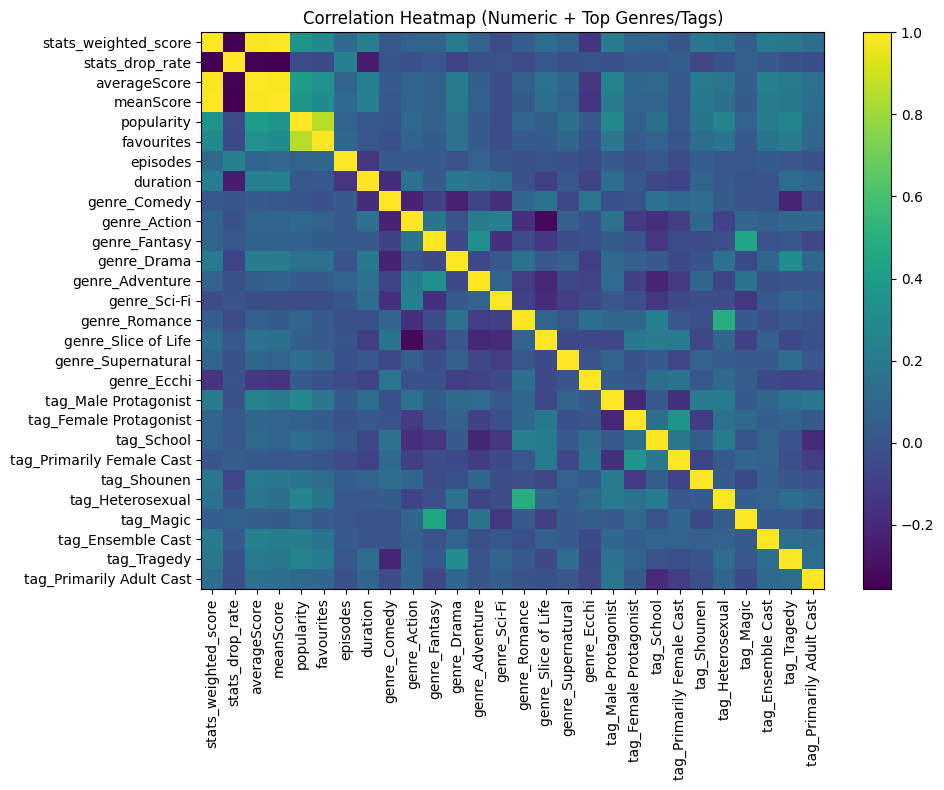

In [49]:
corr = df_final[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(cols_for_corr)), cols_for_corr, rotation=90)
plt.yticks(range(len(cols_for_corr)), cols_for_corr)
plt.title("Correlation Heatmap (Numeric + Top Genres/Tags)")
plt.tight_layout()
plt.show()